## Standard Functions

In [35]:
import imageio
from pprint import pprint
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as filters
import skimage.feature as feature
import skimage.transform as transform

def show_gray(*args, **kwargs):
    show(*args, cmap="gray", **kwargs)

def show(*args, **kwargs):
    import matplotlib.pyplot as plt
    if (len(args) == 1):
        plt.imshow(args[0], **kwargs)
    else:
        f, axis = plt.subplots(1,len(args))
        f.set_figheight(25)
        f.set_figwidth(25)
        for (image,i) in zip(args,range(len(args))):
            axis[i].imshow(image, **kwargs)
    plt.show()

def to_gray(img):
    return np.mean(img, axis=2)

In [36]:
def gradient(channel):
    """Compute unnormalized gradient image along `row` and `col` axes.
    Parameters
    ----------
    channel : (M, N) ndarray
        Grayscale image or one of image channel.
    Returns
    -------
    g_row, g_col : channel gradient along `row` and `col` axes correspondingly.
    """
    g_row = np.empty(channel.shape, dtype=np.double)
    g_row[0, :] = 0
    g_row[-1, :] = 0
    g_row[1:-1, :] = channel[2:, :] - channel[:-2, :]
    g_col = np.empty(channel.shape, dtype=np.double)
    g_col[:, 0] = 0
    g_col[:, -1] = 0
    g_col[:, 1:-1] = channel[:, 2:] - channel[:, :-2]

    return g_row, g_col

## 1

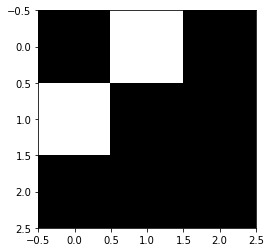

In [37]:
im = np.zeros((3,3))
im[0,1]=1
im[1,0]=1

show_gray(im)

The center pixel of image 1 has a non-zero gradient.

$$g_x = 0-1 = -1$$
$$g_y = 0-1 = -1$$

In [38]:
import skimage.feature._hog as hog
grad = gradient(im)
pprint(grad)

(array([[ 0.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  0.]]))


In [39]:
g_x = grad[0][1,1]
g_y = grad[1][1,1]
print("magnitude:", math.sqrt(g_x**2+g_y**2))
print("orientation:", math.tan(g_y/g_x))

magnitude: 1.4142135623730951
orientation: 1.557407724654902


In [43]:
from skimage.feature import hog
output = hog(im, orientations=1, pixels_per_cell=(3,3), cells_per_block=(1,1),visualise=True)

print(output)
show_gray(output)

(array([0.99997816]), array([[0.        , 0.        , 0.        ],
       [0.        , 0.45792449, 0.        ],
       [0.        , 0.        , 0.        ]]))
/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


TypeError: Image data cannot be converted to float